In [1556]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

pd.set_option('display.max_columns', None)

In [1557]:
def prestazioni(albero, teste_x, teste_y):
    from sklearn.metrics import precision_score
    predictions = albero.predict(teste_x)
    accuracy = accuracy_score(teste_y, predictions)
    precision_score_value = precision_score(teste_y, predictions)
    recall_score_value = recall_score(teste_y,predictions)
    
    print("Accuracy:", (accuracy * 100).round(), "%")
    print('\nConfusion Matrix:')
    print(confusion_matrix(teste_y,predictions))
    print("\nRecall Score:", (recall_score_value * 100).round(), "%")
    print('\nPrecision Score Value', (precision_score_value * 100).round(), "%")

In [1558]:
df = pd.read_csv('SINASC_RO_2019.csv').drop(columns='Unnamed: 0')
df.head(5)

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,DTNASC_DIA,DTNASC_MES,DTCADASTRO_DIA,DTCADASTRO_MES,DTNASCMAE_DIA,DTNASCMAE_MES
0,19,5.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Terça-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
1,29,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8,9,Branca,3055.0,2,2019-03-08,811,2019-03-08,1,1,0,1,24,10,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Quinta-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
2,37,9.0,8 a 11 anos,2,0,3,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8,10,Branca,3460.0,2,2019-03-08,841,2019-03-08,1,2,1,1,32,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Segunda-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
3,30,5.0,12 anos ou mais,0,0,1,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9,10,Parda,2982.0,2,2019-04-03,841,2019-04-03,4,0,0,0,24,6,2.0,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Quarta-feira,Março,Quarta-feira,Abril,Quarta-feira,Abril
4,30,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8,10,Parda,3310.0,2,2019-04-03,811,2019-04-03,4,1,0,1,27,8,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Sábado,Março,Quarta-feira,Abril,Quarta-feira,Abril


In [1559]:
PAIS = df[df['IDADEPAI'] != 0]
PAIS = PAIS.drop_duplicates()

In [1560]:
def default(row):
    if (row['IDADEMAE'] <= 18) & (row['IDADEPAI'] > 18):
        return 1
    else:
        return 0

In [1561]:
PAIS['default'] = PAIS.apply(default, axis=1)

In [1562]:
display(PAIS.head(5))
print(PAIS.shape)

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,DTNASC_DIA,DTNASC_MES,DTCADASTRO_DIA,DTCADASTRO_MES,DTNASCMAE_DIA,DTNASCMAE_MES,default
0,19,5.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Terça-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,0
1,29,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8,9,Branca,3055.0,2,2019-03-08,811,2019-03-08,1,1,0,1,24,10,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Quinta-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,0
2,37,9.0,8 a 11 anos,2,0,3,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8,10,Branca,3460.0,2,2019-03-08,841,2019-03-08,1,2,1,1,32,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Segunda-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março,0
3,30,5.0,12 anos ou mais,0,0,1,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9,10,Parda,2982.0,2,2019-04-03,841,2019-04-03,4,0,0,0,24,6,2.0,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Quarta-feira,Março,Quarta-feira,Abril,Quarta-feira,Abril,0
4,30,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8,10,Parda,3310.0,2,2019-04-03,811,2019-04-03,4,1,0,1,27,8,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Sábado,Março,Quarta-feira,Abril,Quarta-feira,Abril,0


(7089, 41)


In [1563]:
PAIS.columns

Index(['IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'QTDFILMORT',
       'QTDFILTOTAL', 'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC',
       'HORANASC', 'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL',
       'DTCADASTRO', 'NATURALMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'CONSPRENAT', 'MESPRENAT',
       'munResNome', 'munResUf', 'munResLat', 'munResLon', 'munResAlt',
       'munResArea', 'DTNASC_DIA', 'DTNASC_MES', 'DTCADASTRO_DIA',
       'DTCADASTRO_MES', 'DTNASCMAE_DIA', 'DTNASCMAE_MES', 'default'],
      dtype='object')

## Colonne

In [1564]:
"""PAIS = PAIS.drop(columns=['IDADEPAI', 'DTNASCMAE', 'DTNASC_DIA', 'DTNASC_MES', 'DTCADASTRO_DIA', 
                        'DTCADASTRO_MES', 'DTNASCMAE_DIA', 'DTNASCMAE_MES', 'DTNASC', 'HORANASC', 'DTCADASTRO'])"""
PAIS = PAIS[['IDADEMAE', 'PESO', 'default']]

In [1565]:
round((PAIS['default'].value_counts(normalize=True) * 100), 2)

default
0    92.35
1     7.65
Name: proportion, dtype: float64

In [1566]:
PAIS.columns

Index(['IDADEMAE', 'PESO', 'default'], dtype='object')

In [1567]:
PAIS.head()

,IDADEMAE,PESO,default
0,19,3685.0,0
1,29,3055.0,0
2,37,3460.0,0
3,30,2982.0,0
4,30,3310.0,0


In [1568]:
PAIS[PAIS['default'] == 1].head()

,IDADEMAE,PESO,default
11,18,2995.0,1
30,18,2685.0,1
32,18,2830.0,1
36,14,4245.0,1
41,17,2925.0,1


In [1569]:
PAIS[PAIS['default'] == 0].head()

,IDADEMAE,PESO,default
0,19,3685.0,0
1,29,3055.0,0
2,37,3460.0,0
3,30,2982.0,0
4,30,3310.0,0


In [1570]:
df = PAIS
df = pd.get_dummies(df)
df.head(5)

,IDADEMAE,PESO,default
0,19,3685.0,0
1,29,3055.0,0
2,37,3460.0,0
3,30,2982.0,0
4,30,3310.0,0


In [1571]:
y = df['default']
X = df.drop('default', axis=1)

display(X.head(5))
display(y.head(5))

,IDADEMAE,PESO
0,19,3685.0
1,29,3055.0
2,37,3460.0
3,30,2982.0
4,30,3310.0


0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [1572]:
clf_df = DecisionTreeClassifier(random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

clf_df.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [1573]:
# Make predictions on the test set
predictions = clf_df.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", (accuracy * 100).round(), "%")

Accuracy: 98.0 %


In [1574]:
confusion_matrix(y_test,predictions)

array([[1934,   17],
       [  28,  148]], dtype=int64)

## Bilanciare i dati

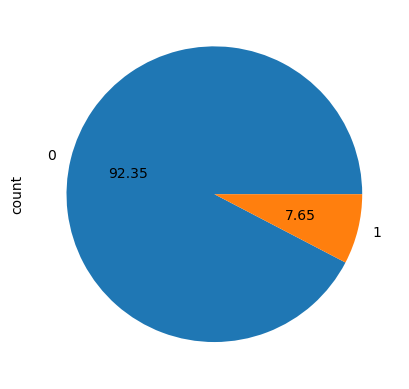

In [1575]:
y.value_counts().plot.pie(autopct='%.2f');

In [1576]:
(y.value_counts()/y.shape[0])*100

default
0    92.354352
1     7.645648
Name: count, dtype: float64

In [1577]:
from imblearn.under_sampling import RandomUnderSampler

In [1578]:
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [1579]:
X_train, y_train = rus.fit_resample(X_train, y_train)

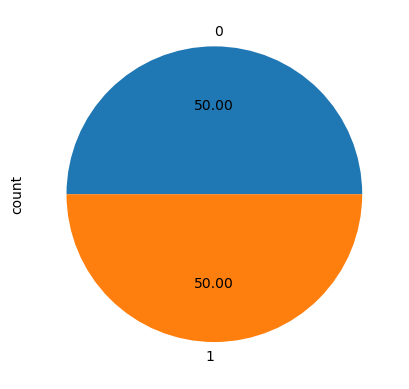

In [1580]:
y_train.value_counts().plot.pie(autopct='%.2f');

## Albero bilanciato

In [1581]:
clf_df2 = DecisionTreeClassifier(random_state=100)

In [1582]:
clf_df2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

In [1583]:
# Make predictions on the test set
predictions = clf_df2.predict(X_test)

# Evaluate the accuracy of the predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", (accuracy * 100).round(), "%")

Accuracy: 99.0 %


In [1584]:
confusion_matrix(y_test,predictions)

array([[1928,   23],
       [   8,  168]], dtype=int64)

In [1585]:
recall_score(y_test,predictions)

0.9545454545454546

In [1586]:
print(X_train.shape)
print(y_train.shape)

(732, 2)
(732,)


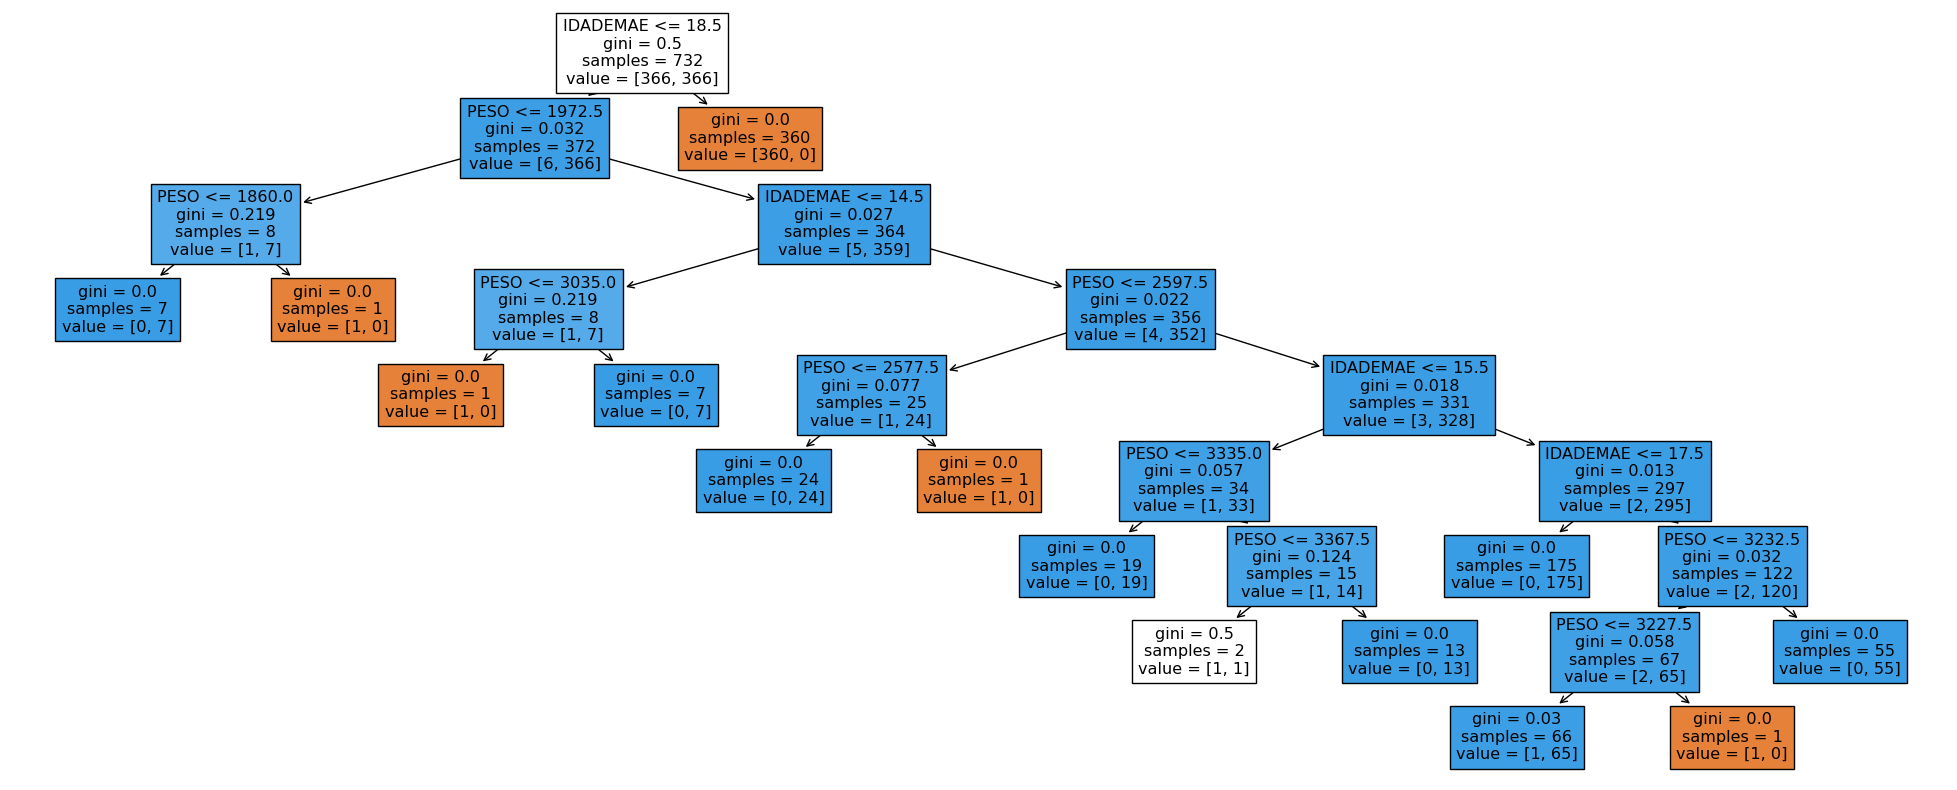

In [1587]:
clf_df3 = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=15, max_features=25, random_state=100)
clf_df3.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
plot_tree(clf_df3,
          filled=True,
          feature_names=X_train.columns);

In [1588]:
predictions = clf_df3.predict(X_test)

In [1589]:
# Calcola il numero totale di 0 e 1 all'interno dell'array
count_0 = np.count_nonzero(predictions == 0)
count_1 = np.count_nonzero(predictions == 1)

# Calcola la proporzione di 0 e 1 rispetto alla lunghezza totale dell'array
proportion_0 = count_0 / len(predictions)
proportion_1 = count_1 / len(predictions)

# Stampa i risultati
print("Proporzione di 0:", proportion_0)
print("Proporzione di 1:", proportion_1)

Proporzione di 0: 0.9097320169252469
Proporzione di 1: 0.09026798307475317


In [1590]:
prestazioni(clf_df3, X_test, y_test)

Accuracy: 99.0 %

Confusion Matrix:
[[1928   23]
 [   7  169]]

Recall Score: 96.0 %

Precision Score Value 88.0 %


## Post pruning

In [1591]:
clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [1592]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [1593]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_score = [clf.score(X_test, y_test) for clf in clfs]

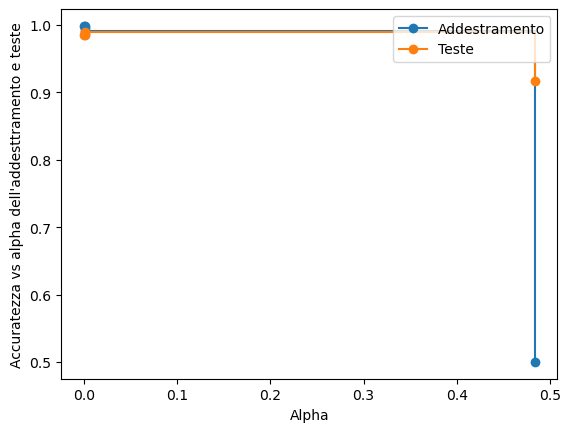

In [1594]:
fig, ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel("Accuratezza vs alpha dell'addesttramento e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label='Addestramento',
        drawstyle='steps-post')
ax.plot(ccp_alphas, test_score, marker='o', label='Teste',
        drawstyle='steps-post')
ax.legend()
plt.show()

In [1595]:
ALPHA = pd.DataFrame({'Alphas':ccp_alphas.tolist(), 'Score': test_score})
ALPHA['Score'].max()

0.9891866478608369

In [1596]:
#ALPHA = ALPHA[ALPHA['Score'] == 0.9891866478608369]['Alphas']

In [1597]:
#ALPHA = list(ALPHA.to_dict().values())[0]

## L'albero migliore

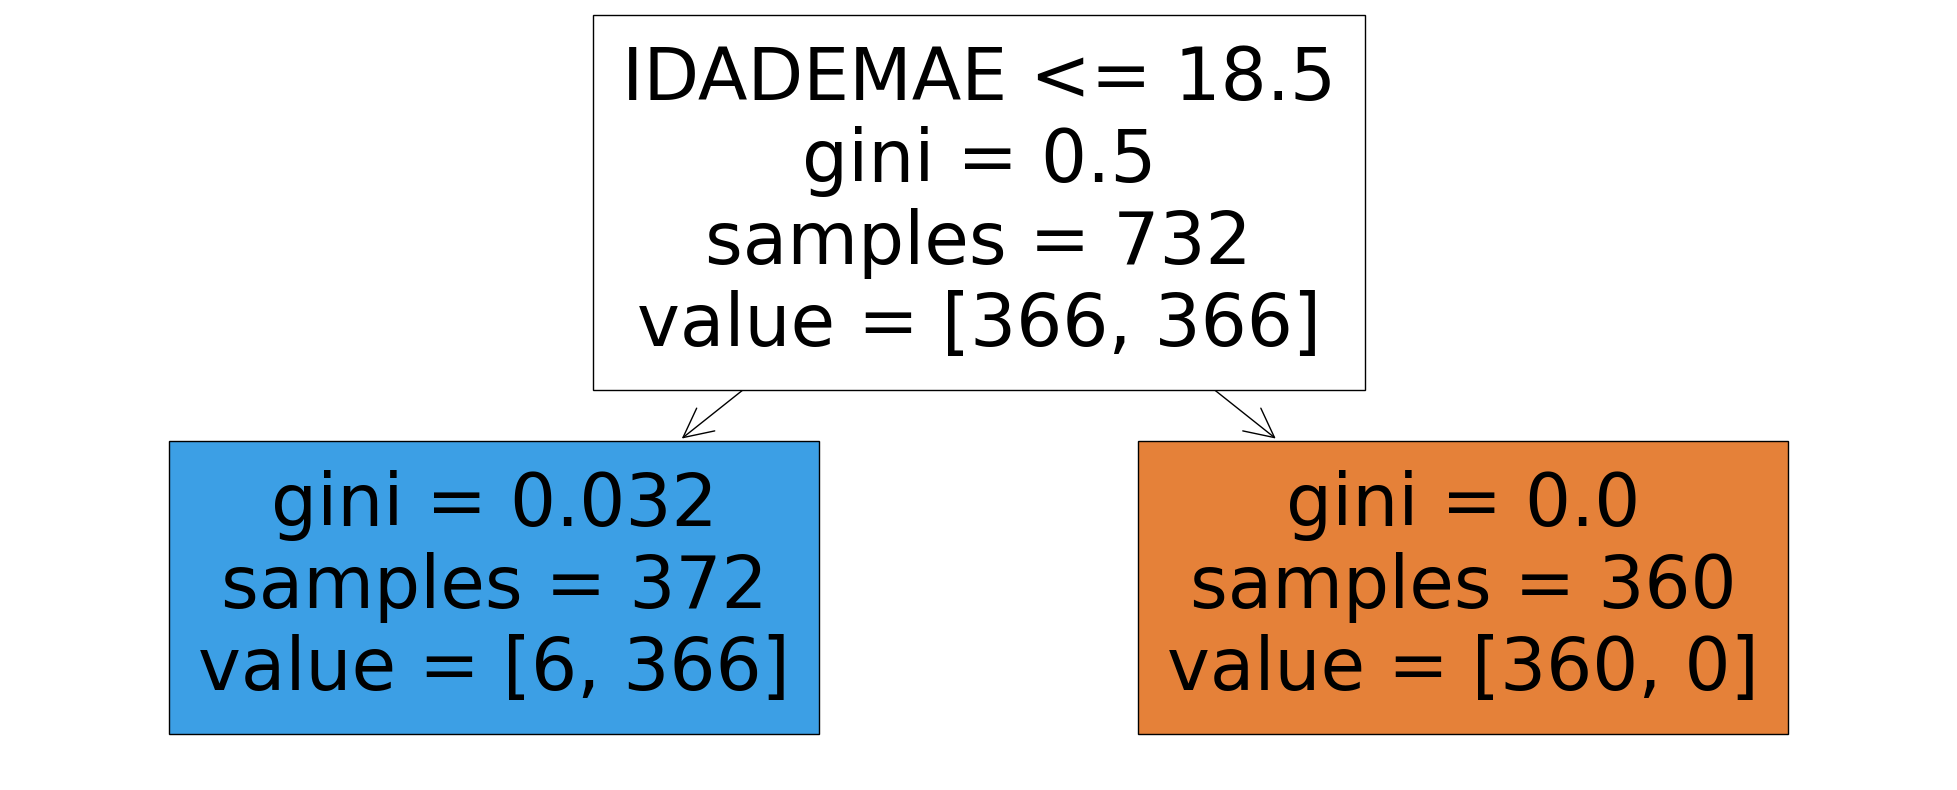

In [1598]:
clf_df4 = DecisionTreeClassifier(ccp_alpha=0.001359, random_state=100) # 0.001359
clf_df4.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
plot_tree(clf_df4,
          filled=True,
          feature_names=X_train.columns);

In [1599]:
predictions = clf_df4.predict(X_test)

In [1600]:
# Calcola il numero totale di 0 e 1 all'interno dell'array
count_0 = np.count_nonzero(predictions == 0)
count_1 = np.count_nonzero(predictions == 1)

# Calcola la proporzione di 0 e 1 rispetto alla lunghezza totale dell'array
proportion_0 = count_0 / len(predictions)
proportion_1 = count_1 / len(predictions)

# Stampa i risultati
print("Proporzione di 0:", proportion_0)
print("Proporzione di 1:", proportion_1)

Proporzione di 0: 0.9064409967089798
Proporzione di 1: 0.09355900329102021


In [1601]:
prestazioni(clf_df4, X_test, y_test)

Accuracy: 99.0 %

Confusion Matrix:
[[1928   23]
 [   0  176]]

Recall Score: 100.0 %

Precision Score Value 88.0 %


In [1602]:
clf_df4.get_params()

{'ccp_alpha': 0.001359,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

In [1603]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.8844221105527639

In [1604]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1951
           1       0.88      1.00      0.94       176

    accuracy                           0.99      2127
   macro avg       0.94      0.99      0.97      2127
weighted avg       0.99      0.99      0.99      2127



In [1605]:
feature_names = X.columns

feature_importance = pd.DataFrame(clf_df4.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance.head(5)

,0
IDADEMAE,1.0
PESO,0.0


<Axes: >

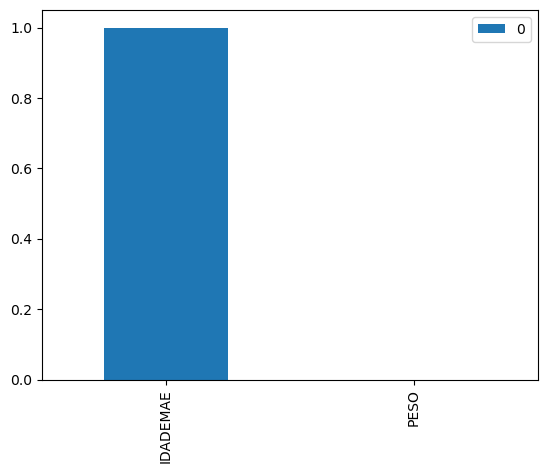

In [1606]:
features = list(feature_importance[feature_importance[0]>0].index)
feature_importance.head(10).plot(kind='bar')

### Pulire

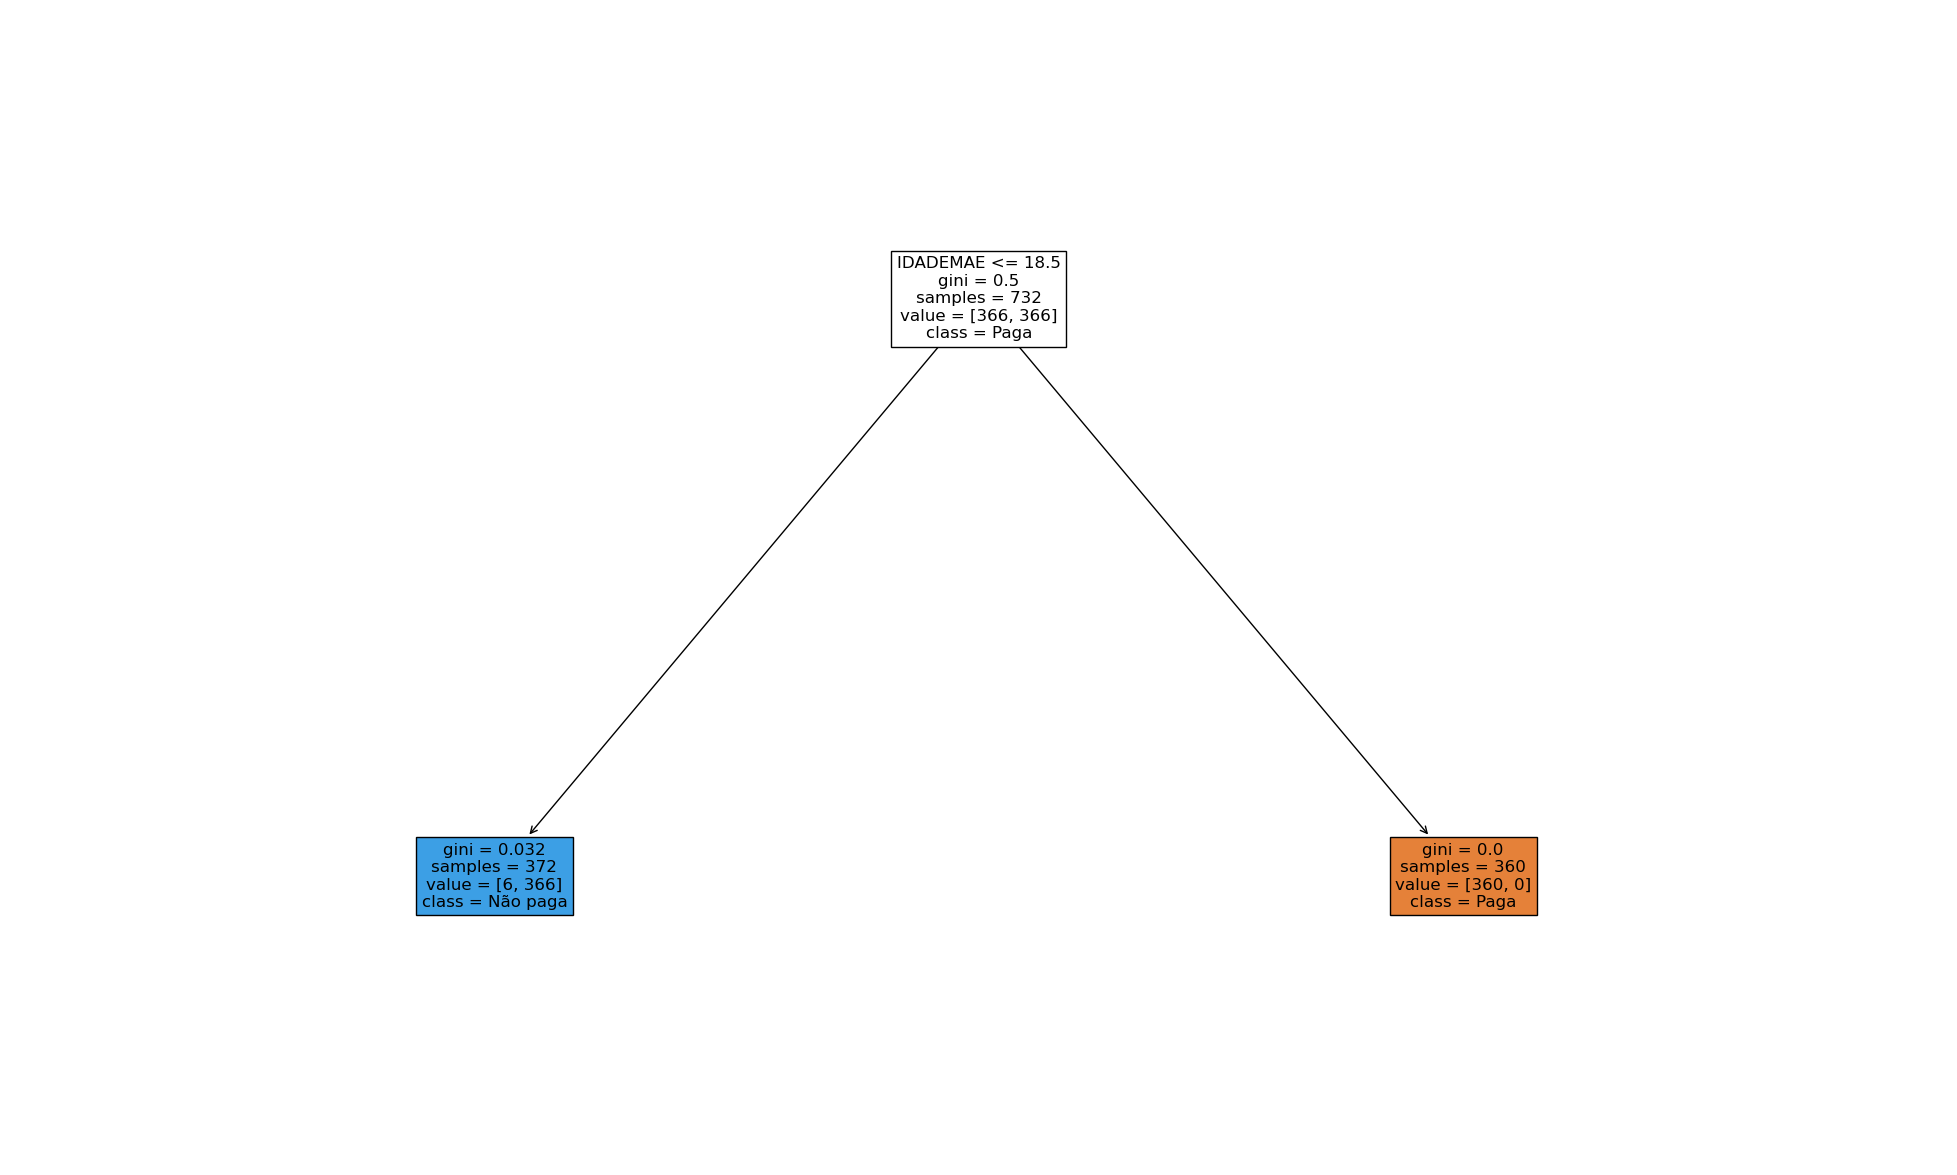

In [1607]:
from sklearn import tree

fig = plt.figure(figsize=(25,15))
_ = tree.plot_tree(clf_df4, 
                   feature_names=feature_names,  
                   class_names={0:'Paga', 1:'Não paga'},
                   filled=True,
                  fontsize=12)

In [1608]:
import pickle

# Salva il modello in un file
with open('clf_model.pkl', 'wb') as model_file:
    pickle.dump(clf_df4, model_file)

print("Modello salvato correttamente in 'clf_model.pkl'")

Modello salvato correttamente in 'clf_model.pkl'


In [1609]:
# Carica il modello da file
with open('clf_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

In [1610]:
Sinasc = pd.read_csv('SINASC_RO_2019.csv').drop(columns='Unnamed: 0')
#Sinasc = Sinasc[Sinasc['IDADEPAI'] == 0]
Sinasc_Ml = Sinasc[['IDADEMAE', 'PESO']]
Sinasc_Ml.head()

,IDADEMAE,PESO
0,19,3685.0
1,29,3055.0
2,37,3460.0
3,30,2982.0
4,30,3310.0


In [1611]:
new_df = Sinasc_Ml

# Fai previsioni con il modello caricato
new_predictions = loaded_model.predict(new_df)

# Aggiungi la colonna "Target" al dataframe
new_df['Target'] = new_predictions

# Stampa il dataframe risultante
pd.DataFrame(new_df)

C:\Users\Enzo Schitni\AppData\Local\Temp\ipykernel_5068\3073244977.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Target'] = new_predictions


,IDADEMAE,PESO,Target
0,19,3685.0,0
1,29,3055.0,0
2,37,3460.0,0
3,30,2982.0,0
4,30,3310.0,0
...,...,...,...
24327,32,2110.0,0
24328,19,3310.0,0
24329,24,3065.0,0
24330,21,2352.0,0


In [1612]:
predictions = new_df['Target']
predictions.to_csv('predictions.csv')

In [1613]:
round((new_df['Target'].value_counts(normalize=True) * 100), 2)

Target
0    88.03
1    11.97
Name: proportion, dtype: float64

In [1614]:
new_df[new_df['Target'] == 1]

,IDADEMAE,PESO,Target
11,18,2995.0,1
30,18,2685.0,1
32,18,2830.0,1
36,14,4245.0,1
41,17,2925.0,1
...,...,...,...
24276,18,2880.0,1
24277,18,3500.0,1
24278,18,2660.0,1
24290,17,3175.0,1


In [1615]:
num_righe = len(new_df.index)
print(f"Numero di righe: {num_righe}")


Numero di righe: 24332


In [1616]:
"""import pickle

# Salvare il modello in un file pickle
pickle.dump(clf_df4, open('modello_salvato.pkl', 'wb'))

# Caricare il modello salvato dal file pickle
modello_caricato = pickle.load(open('modello_salvato.pkl', 'rb'))"""

"import pickle\n\n# Salvare il modello in un file pickle\npickle.dump(clf_df4, open('modello_salvato.pkl', 'wb'))\n\n# Caricare il modello salvato dal file pickle\nmodello_caricato = pickle.load(open('modello_salvato.pkl', 'rb'))"

In [1617]:
Sinasc 

,IDADEMAE,ESTCIVMAE,ESCMAE,QTDFILVIVO,QTDFILMORT,QTDFILTOTAL,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,NATURALMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,CONSPRENAT,MESPRENAT,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,DTNASC_DIA,DTNASC_MES,DTCADASTRO_DIA,DTCADASTRO_MES,DTNASCMAE_DIA,DTNASCMAE_MES
0,19,5.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Cesáreo,4,2019-02-19,1620.0,Masculino,9,10,Branca,3685.0,2,2019-03-08,811,2019-03-08,1,0,0,0,26,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Terça-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
1,29,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-02-21,1830.0,Feminino,8,9,Branca,3055.0,2,2019-03-08,811,2019-03-08,1,1,0,1,24,10,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Quinta-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
2,37,9.0,8 a 11 anos,2,0,3,37 a 41 semanas,Única,Cesáreo,4,2019-02-25,915.0,Feminino,8,10,Branca,3460.0,2,2019-03-08,841,2019-03-08,1,2,1,1,32,8,1.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Segunda-feira,Fevereiro,Sexta-feira,Março,Sexta-feira,Março
3,30,5.0,12 anos ou mais,0,0,1,37 a 41 semanas,Única,Cesáreo,3,2019-03-20,835.0,Feminino,9,10,Parda,2982.0,2,2019-04-03,841,2019-04-03,4,0,0,0,24,6,2.0,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Quarta-feira,Março,Quarta-feira,Abril,Quarta-feira,Abril
4,30,2.0,8 a 11 anos,1,0,2,37 a 41 semanas,Única,Cesáreo,4,2019-03-23,750.0,Feminino,8,10,Parda,3310.0,2,2019-04-03,811,2019-04-03,4,1,0,1,27,8,2.0,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Sábado,Março,Quarta-feira,Abril,Quarta-feira,Abril
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24327,32,2.0,12 anos ou mais,1,0,2,32 a 36 semanas,Única,Cesáreo,4,2019-12-13,2030.0,Masculino,8,9,Branca,2110.0,2,2020-09-28,825,2020-09-28,1,1,1,0,35,7,1.0,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Sexta-feira,Dezembro,Segunda-feira,Setembro,Segunda-feira,Setembro
24328,19,1.0,8 a 11 anos,0,0,1,37 a 41 semanas,Única,Vaginal,4,2019-10-04,650.0,Masculino,8,9,Branca,3310.0,2,2019-10-16,811,2019-10-16,1,0,0,0,0,12,1.0,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723,Sexta-feira,Outubro,Quarta-feira,Outubro,Quarta-feira,Outubro
24329,24,2.0,8 a 11 anos,0,1,1,37 a 41 semanas,Única,Cesáreo,4,2019-08-02,1430.0,Masculino,9,10,Parda,3065.0,2,2019-08-07,811,2019-08-07,4,1,0,0,30,8,1.0,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Sexta-feira,Agosto,Quarta-feira,Agosto,Quarta-feira,Agosto
24330,21,2.0,8 a 11 anos,1,0,2,32 a 36 semanas,Única,Vaginal,4,2019-12-23,741.0,Masculino,8,9,Parda,2352.0,2,2020-01-07,811,2020-01-07,4,1,0,1,24,10,1.0,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915,Segunda-feira,Dezembro,Terça-feira,Janeiro,Terça-feira,Janeiro
